In [23]:
import numpy as np
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import nibabel as nib
import pandas as pd
from IPython.display import clear_output
import importlib
from skimage import morphology
from skimage.segmentation import find_boundaries
import porespy as ps
from skimage.morphology import disk, binary_dilation
import pickle
from collections import Counter

In [8]:
sys.path.insert(1, "/Users/dvarelat/Documents/MASTER/TFM/methods")
import cardiac_region
importlib.reload(cardiac_region)
import cardiac_region as c

In [9]:
ESPECIMEN = "20190504_E1"

In [4]:
cellpose_nu = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/RESULTS/nuclei/{ESPECIMEN}_MASK_EQ_XYZ_decon.nii.gz"
gasp_mem = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/RESULTS/membranes/GASP_PNAS/{ESPECIMEN}_mGFP_XYZ_predictions_GASP.nii.gz"
maskfile = f"/Users/dvarelat/Documents/MASTER/TFM/methods/division/INFERENCE/{ESPECIMEN}_predmask.nii.gz"
nuclei = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/DECON_05/DAPI/{ESPECIMEN}_DAPI_decon_0.5.nii.gz"
mem = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/DECON_05/MGFP/{ESPECIMEN}_mGFP_decon_0.5.nii.gz"
FILE = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/EXTRACTION/1_{ESPECIMEN}/cell_properties.csv"

In [5]:
prediction = nib.load(maskfile).get_fdata()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
------------------------------------------------------------
SOURCE     : nibabel.global.log_raise 
TIME STAMP : 2022-05-23 08:14:31,631
------------------------------------------------------------


In [11]:
pred_nu = nib.load(cellpose_nu).get_fdata()
pred_mem = nib.load(gasp_mem).get_fdata()
MEM = nib.load(mem).get_fdata()
MEM = MEM[:,:,:,0]
DAPI = nib.load(nuclei).get_fdata()
DAPI = DAPI[:,:,:,0]

In [12]:
df = pd.read_csv(FILE)

In [15]:
prediction = (prediction > 0.5).astype("uint16")
mask_mem = np.where(pred_mem != 0, True, False)
mask_on_nuclei = mask_mem * pred_nu
mask_nuclei = mask_mem * DAPI

In [16]:
np.unique(prediction)

array([0, 1], dtype=uint16)

In [29]:
labels_div_all = np.unique(mask_on_nuclei * prediction)
labels_div_all = [i for i in labels_div_all if i != 0]
len(labels_div_all)

1483

In [30]:
props_mem = ps.metrics.regionprops_3D(morphology.label(pred_mem))
props_nu = ps.metrics.regionprops_3D(morphology.label(mask_on_nuclei))

In [31]:
print(len(props_mem))
print(len(props_nu))

3751
6052


In [37]:
centroids_nu = [[round(i) for i in p["centroid"]] for p in props_nu]
NU_original_labels_centroids = [pred_nu[c[0], c[1], c[2]] for c in centroids_nu] #labels nuclei
index_labels_div_inprops = [i for i,l in enumerate(NU_original_labels_centroids) if l in labels_div_all]
len(index_labels_div_inprops)

1975

In [62]:
len(set(NU_original_labels_centroids))

4473

In [39]:
## MARK CERTAIN CELLS IN SLICE
im_nu = np.zeros(shape=pred_mem.shape)
for i,cell in enumerate(index_labels_div_inprops):
    r = props_nu[cell]
    mask = r.image
    temp = mask * 1
    s = ps.tools.bbox_to_slices(r.bbox)
    im_nu[s] += temp

In [150]:
c.saveNifti(mask_nuclei, c.load3D_metadata(gasp_mem), 
            f"/Users/dvarelat/Documents/MASTER/TFM/DATA/MASK_NUCLEI/20190504_E1_masknuclei.nii.gz")

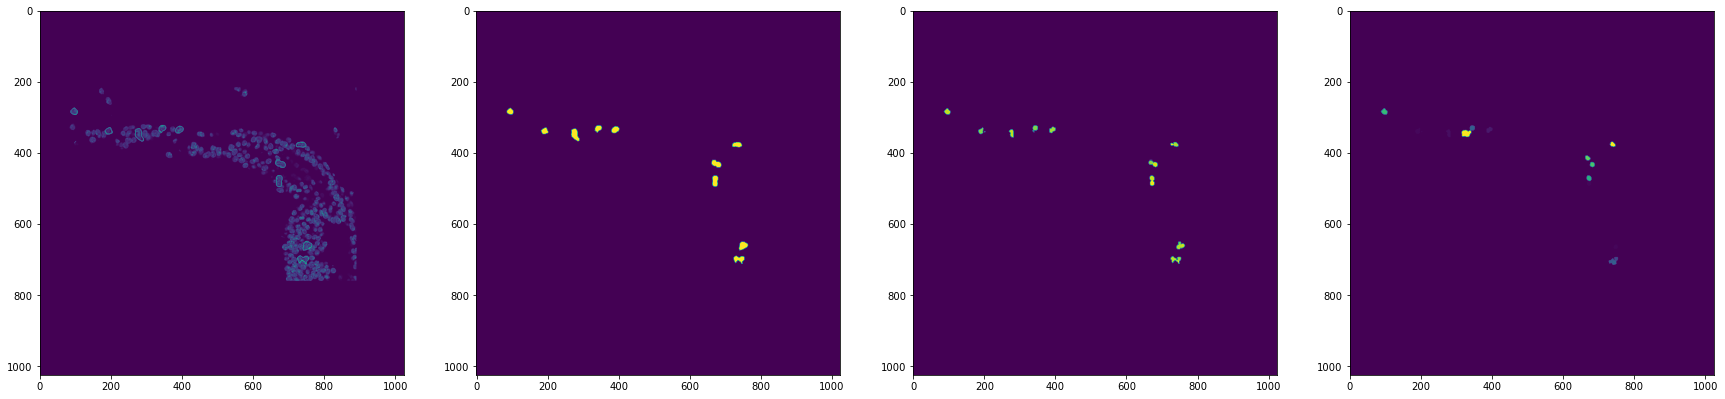

In [59]:
n = 100
plt.figure(figsize=(30,30))
plots = [mask_nuclei[:,:,n] + 100*find_boundaries(prediction[:,:,n]),
         prediction[:,:,n], mask_on_nuclei[:,:,n] * prediction[:,:,n], im_nu]
for i in range(len(plots)):
    plt.subplot(1,len(plots), i+1)
    plt.imshow(plots[i])

### Recorrer mask por slice

In [144]:
z = 100
prediction[:,:,z].shape
labels_div_z_count =  dict(Counter((mask_on_nuclei[:,:,z] * prediction[:,:,z]).flatten()))
print(len(labels_div_z_count))
labels_div_z = [k for k,v in labels_div_z_count.items() if v>5]
len(labels_div_z_count_)

24


23

In [88]:
labels_div_z = np.unique(mask_on_nuclei[:,:,z] * prediction[:,:,z])
labels_div_z = [l for l in labels_div_z if l!= 0 ]
labels_div_z = [l for l in labels_div_z if l in NU_original_labels_centroids]
index_cell_labels_div_z = [NU_original_labels_centroids.index(l) for l in labels_div_z]
len(index_cell_labels_div_z)

23

In [145]:
cell_index_lists = []
for z in range(mask_on_nuclei.shape[2]):
    print(z)
    #labels_div_z = np.unique(mask_on_nuclei[:,:,z] * prediction[:,:,z])
    labels_div_z_count =  dict(Counter((mask_on_nuclei[:,:,z] * prediction[:,:,z]).flatten()))
    labels_div_z = [k for k,v in labels_div_z_count.items() if v>5]
    labels_div_z = [l for l in labels_div_z if l!= 0 ]
    labels_div_z = [l for l in labels_div_z if l in NU_original_labels_centroids]
    index_cell_labels_div_z = [NU_original_labels_centroids.index(l) for l in labels_div_z]
    cell_index_lists.append(index_cell_labels_div_z)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [146]:
flat_list_cells = [item for sublist in cell_index_lists for item in sublist]

In [147]:
dict_label_number_z = {cell:len([i for i in cell_index_lists if cell in i]) for cell in set(flat_list_cells)}
print(len(dict_label_number_z))
flat_list_cells_filter = [k for k,v in dict_label_number_z.items() if v>2]
len(flat_list_cells_filter)

1318


535

In [161]:
dict_label_number_z

{15: 3,
 16: 4,
 17: 3,
 18: 2,
 25: 1,
 30: 1,
 37: 5,
 43: 1,
 45: 1,
 47: 3,
 48: 1,
 50: 2,
 54: 3,
 60: 2,
 61: 6,
 62: 6,
 69: 1,
 73: 2,
 82: 2,
 89: 2,
 91: 1,
 94: 1,
 99: 4,
 107: 3,
 109: 1,
 112: 2,
 227: 2,
 232: 1,
 255: 1,
 259: 3,
 261: 1,
 278: 1,
 279: 1,
 282: 7,
 299: 2,
 300: 3,
 305: 2,
 306: 3,
 307: 1,
 313: 1,
 315: 2,
 322: 2,
 325: 2,
 332: 2,
 336: 3,
 344: 6,
 345: 8,
 357: 3,
 370: 9,
 380: 3,
 397: 3,
 436: 1,
 441: 2,
 451: 1,
 453: 2,
 456: 1,
 460: 1,
 484: 4,
 490: 1,
 496: 5,
 499: 2,
 504: 3,
 520: 2,
 539: 4,
 540: 3,
 545: 2,
 548: 3,
 550: 4,
 570: 6,
 571: 3,
 572: 3,
 574: 2,
 575: 2,
 595: 6,
 598: 1,
 599: 4,
 601: 1,
 606: 1,
 611: 2,
 618: 6,
 630: 1,
 631: 1,
 635: 8,
 653: 2,
 654: 1,
 659: 6,
 662: 3,
 665: 1,
 676: 6,
 680: 3,
 684: 1,
 688: 2,
 689: 10,
 697: 12,
 698: 4,
 709: 7,
 710: 10,
 727: 2,
 739: 5,
 753: 10,
 761: 4,
 764: 6,
 768: 1,
 769: 7,
 779: 3,
 780: 14,
 790: 2,
 792: 1,
 793: 1,
 798: 2,
 800: 5,
 802: 1,
 804: 2,
 

In [149]:
c.saveNifti(im_nu, c.load3D_metadata(gasp_mem), 
            f"/Users/dvarelat/Documents/MASTER/TFM/DATA/EXTRACTION/otros/20190504_E1_labels_divs.nii.gz")

In [ ]:
im_nu = np.zeros(shape=mask_on_nuclei.shape)
labels = [NU_original_labels_centroids[i] for i in flat_list_cells_filter]
for i,cell in enumerate(flat_list_cells_filter):
    r = props_nu[cell]
    mask = r.imagem
    temp = mask * labels[i]
    s = ps.tools.bbox_to_slices(r.bbox)
    im_nu[s] += temp

In [181]:
c.saveNifti(im_nu, c.load3D_metadata(gasp_mem), 
            f"/Users/dvarelat/Documents/MASTER/TFM/DATA/EXTRACTION/otros/20190504_E1_labels_divs_mem.nii.gz")

In [94]:
#z_coords_prop = [[c[2] for c in p.coords] for p in props_nu] ## todos los z de cada cell in props

In [129]:
#cellindex_z = [i for i, coords_p in enumerate(z_coords_prop) if z in coords_p]
 ##labels de los nucleis que quedan con mask

### hacer parejas membrana núcleo

In [159]:
labels_centroid_nu_in_mem = [pred_mem[c[0], c[1], c[2]] for c in centroids_nu]
print(len(labels_centroid_nu_in_mem))
print(len(set(labels_centroid_nu_in_mem)))
len([i for i in labels_centroid_nu_in_mem if i ==0 ])

6052
3183


93

In [174]:
centroids_nu_cells_div = [[round(i) for i in props_nu[p]["centroid"]] for p in flat_list_cells_filter]
labels_centroids_inMEM = [pred_mem[c[0], c[1], c[2]] for c in centroids_nu_cells_div]
len(labels_centroids_inMEM)

535

In [178]:
labels_centroids_inMEM = [l for l in labels_centroids_inMEM if l in original_labels_centroids]
len(labels_centroids_inMEM)

530

In [165]:
centroids_mem = [[round(i) for i in p["centroid"]] for p in props_mem]
original_labels_centroids = [pred_mem[c[0], c[1], c[2]] for c in centroids_mem]

In [179]:
index_cellMEM_labels_div_z = [original_labels_centroids.index(l) for l in labels_centroids_inMEM]

In [180]:
im_mem = np.zeros(shape=mask_on_nuclei.shape)
labels = [original_labels_centroids[i] for i in index_cellMEM_labels_div_z]
for i,cell in enumerate(index_cellMEM_labels_div_z):
    r = props_mem[cell]
    mask = r.image
    temp = mask * labels[i]
    s = ps.tools.bbox_to_slices(r.bbox)
    im_mem[s] += temp

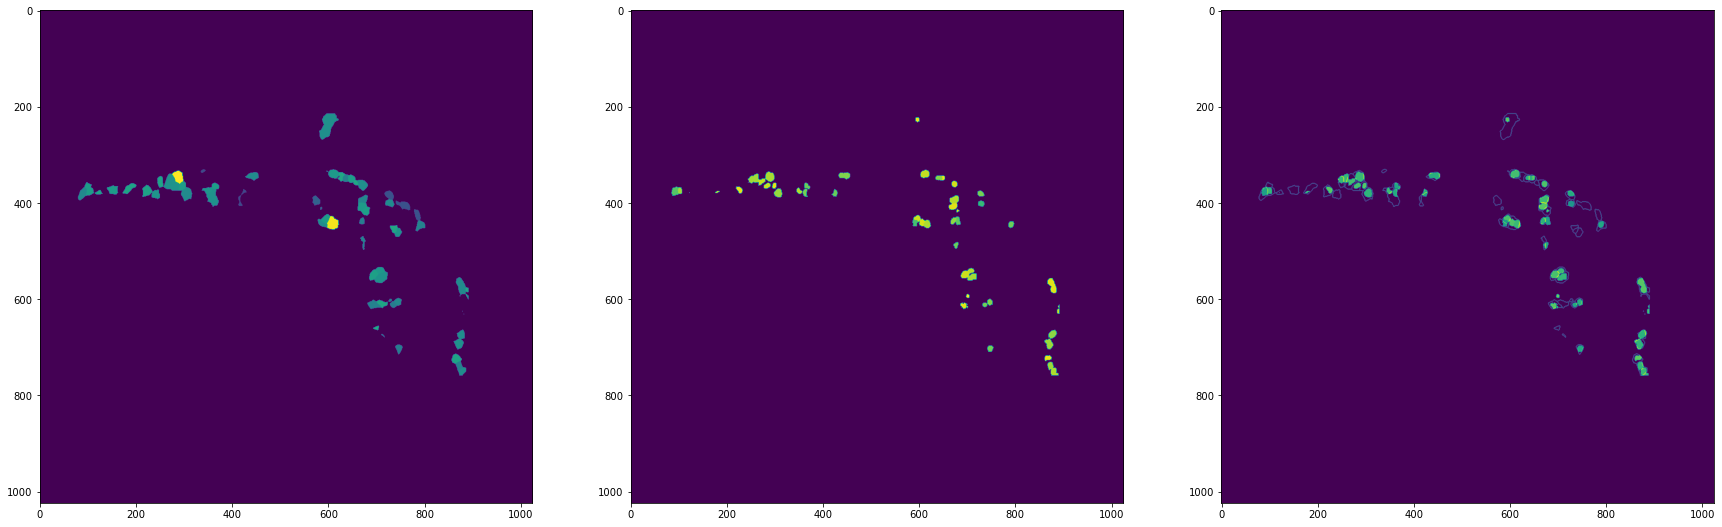

In [185]:
n = 114
plt.figure(figsize=(30,30))
plots = [im_mem[:,:,n],
         im_nu[:,:,n],im_nu[:,:,n] + 1000*find_boundaries(im_mem[:,:,n]) ]
for i in range(len(plots)):
    plt.subplot(1,len(plots), i+1)
    plt.imshow(plots[i])

## RADIOMICS

In [191]:
from radiomics import featureextractor, getFeatureClasses
import radiomics
import SimpleITK as sitk
from radiomics import shape, firstorder, glcm, imageoperations, glrlm, glszm

In [304]:
### PARA TODAS LAS CELLS
spacing = [float(c.load3D_metadata(nuclei)['x_res']), 
           float(c.load3D_metadata(nuclei)['y_res']), 
           float(c.load3D_metadata(nuclei)['z_res'])] 
results = []
for cell in range(len(props_nu)):
    img = np.swapaxes(np.swapaxes(DAPI[props_nu[cell].slice], 0, 2), 1, 2)
    m = np.swapaxes(np.swapaxes(props_nu[cell].mask, 0, 2), 1, 2)
    sitk_img = sitk.GetImageFromArray(img)
    sitk_img = sitk.JoinSeries(sitk_img)[:,:,:,0]
    sitk_img.SetSpacing(spacing)
    sitk_mask = sitk.GetImageFromArray(m.astype("uint16"))
    sitk_mask = sitk.JoinSeries(sitk_mask)[:,:,:,0]
    sitk_mask.SetSpacing(spacing)
    shapeFeatures = shape.RadiomicsShape(sitk_img, sitk_mask)
    shapeFeatures.enableAllFeatures()
    result = shapeFeatures.execute()
    result["cell"] = str(cell)
    firstOrderFeatures = firstorder.RadiomicsFirstOrder(sitk_img, sitk_mask)
    result_fo = firstOrderFeatures.execute()
    result.update(result_fo)
    result.update({k:v.tolist() for k,v in result.items() if isinstance(v,np.ndarray) })
    results.append(result)

/opt/miniconda3/envs/porespy/lib/python3.8/site-packages/radiomics/firstorder.py:297: RuntimeWarning: Mean of empty slice
  return numpy.nanmean(numpy.absolute(percentileArray - numpy.nanmean(percentileArray, 1, keepdims=True)), 1)
Encountered 1 eigenvalues < 0 and > -1e-10, rounding to 0
------------------------------------------------------------
SOURCE     : radiomics.shape._initSegmentBasedCalculation 
TIME STAMP : 2022-05-23 11:51:26,179
------------------------------------------------------------
Encountered 1 eigenvalues < 0 and > -1e-10, rounding to 0
------------------------------------------------------------
SOURCE     : radiomics.shape._initSegmentBasedCalculation 
TIME STAMP : 2022-05-23 11:51:26,209
------------------------------------------------------------
Encountered 1 eigenvalues < 0 and > -1e-10, rounding to 0
------------------------------------------------------------
SOURCE     : radiomics.shape._initSegmentBasedCalculation 
TIME STAMP : 2022-05-23 11:51:27,084
-

Encountered 1 eigenvalues < 0 and > -1e-10, rounding to 0
------------------------------------------------------------
SOURCE     : radiomics.shape._initSegmentBasedCalculation 
TIME STAMP : 2022-05-23 11:52:09,936
------------------------------------------------------------
Encountered 1 eigenvalues < 0 and > -1e-10, rounding to 0
------------------------------------------------------------
SOURCE     : radiomics.shape._initSegmentBasedCalculation 
TIME STAMP : 2022-05-23 11:52:10,380
------------------------------------------------------------
Encountered 1 eigenvalues < 0 and > -1e-10, rounding to 0
------------------------------------------------------------
SOURCE     : radiomics.shape._initSegmentBasedCalculation 
TIME STAMP : 2022-05-23 11:52:11,506
------------------------------------------------------------


In [302]:
result.update({k:v.tolist() for k,v in result.items() if isinstance(v,np.ndarray) })

In [303]:
result

{'Elongation': nan,
 'Flatness': nan,
 'LeastAxisLength': 0.0,
 'MajorAxisLength': 0.0,
 'Maximum2DDiameterColumn': 0.9957029819488525,
 'Maximum2DDiameterRow': 0.9957029819488525,
 'Maximum2DDiameterSlice': 0.7572060227394104,
 'Maximum3DDiameter': 0.9957029819488525,
 'MeshVolume': 0.09514953641235709,
 'MinorAxisLength': 0.0,
 'Sphericity': 0.8325486099808872,
 'SurfaceArea': 1.2106324450860555,
 'SurfaceVolumeRatio': 12.72347181850095,
 'VoxelVolume': 0.5708972184741427,
 'cell': 6051,
 '10Percentile': 21.0,
 '90Percentile': 21.0,
 'Energy': 441.0,
 'Entropy': -3.203426503814917e-16,
 'InterquartileRange': 0.0,
 'Kurtosis': 0.0,
 'Maximum': 21.0,
 'MeanAbsoluteDeviation': 0.0,
 'Mean': 21.0,
 'Median': 21.0,
 'Minimum': 21.0,
 'Range': 0.0,
 'RobustMeanAbsoluteDeviation': 0.0,
 'RootMeanSquared': 21.0,
 'Skewness': 0.0,
 'TotalEnergy': 251.7656733470969,
 'Uniformity': 1.0,
 'Variance': 0.0}

In [316]:
df = pd.DataFrame(results)
div = df[df["cell"].isin([str(i) for i in flat_list_cells_filter])]
nodiv = df[~df["cell"].isin([str(i) for i in flat_list_cells_filter])]
nodiv.shape

(5517, 33)

In [317]:
div.shape

(535, 33)

In [322]:
columns_fo = list(result_fo.keys())
div[columns_fo].describe()

,10Percentile,90Percentile,Energy,Entropy,InterquartileRange,Kurtosis,Maximum,MeanAbsoluteDeviation,Mean,Median,Minimum,Range,RobustMeanAbsoluteDeviation,RootMeanSquared,Skewness,TotalEnergy,Uniformity,Variance
count,535.000000,535.000000,5.350000e+02,5.350000e+02,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,5.350000e+02,535.000000,535.000000
mean,18.415888,45.553645,2.445376e+06,1.222112e+00,13.122897,5.868214,91.246729,8.705389,31.026160,29.242056,6.945794,84.300935,5.695140,33.205010,1.230899,1.396059e+06,0.496022,144.415041
std,2.932849,8.179722,1.482421e+06,2.054041e-01,3.940268,2.188823,19.808892,2.175672,4.962420,5.080790,3.248574,20.970844,1.611305,5.394347,0.520170,8.463103e+05,0.078957,67.386591
min,9.400000,15.000000,2.250000e+02,-3.203427e-16,0.000000,0.000000,15.000000,0.000000,15.000000,14.500000,1.000000,0.000000,0.000000,15.000000,-0.363856,1.284519e+02,0.304452,0.000000
25%,16.000000,40.000000,1.441745e+06,1.143994e+00,11.000000,4.321412,80.000000,7.350050,27.651986,26.000000,5.000000,73.000000,4.737781,29.496024,0.904029,8.230882e+05,0.460260,100.937632
50%,18.000000,45.000000,2.114925e+06,1.213720e+00,12.500000,5.693461,90.000000,8.521663,30.627273,28.000000,6.000000,84.000000,5.500490,32.698911,1.251072,1.207405e+06,0.483291,131.739233
75%,20.000000,50.000000,3.235410e+06,1.317687e+00,15.000000,7.180592,102.000000,9.795739,33.434325,31.000000,9.000000,95.000000,6.331874,35.762778,1.581289,1.847086e+06,0.518620,176.261889
max,33.000000,78.000000,9.188102e+06,1.875157e+00,34.000000,18.297845,176.000000,18.469388,50.889228,52.000000,27.000000,170.000000,13.591960,54.775623,3.044609,5.245462e+06,1.000000,560.551020


In [323]:
nodiv[columns_fo].describe()

,10Percentile,90Percentile,Energy,Entropy,InterquartileRange,Kurtosis,Maximum,MeanAbsoluteDeviation,Mean,Median,Minimum,Range,RobustMeanAbsoluteDeviation,RootMeanSquared,Skewness,TotalEnergy,Uniformity,Variance
count,5517.000000,5517.000000,5.517000e+03,5.517000e+03,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5267.000000,5517.000000,5517.000000,5.517000e+03,5517.000000,5517.000000
mean,19.650716,38.303100,1.322595e+06,8.611550e-01,9.075539,4.591480,69.247961,6.208526,28.297723,26.984502,12.639478,56.608483,4.032777,29.808567,0.924180,7.550659e+05,0.641444,97.254840
std,6.552850,12.420298,1.563292e+06,5.371708e-01,5.939662,3.357591,36.159271,3.882426,7.616654,7.364850,9.003765,41.698959,2.590779,8.214645,0.821429,8.924792e+05,0.221500,86.736754
min,3.000000,3.000000,9.000000e+00,-3.203427e-16,0.000000,0.000000,3.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,3.000000,-1.493459,5.138075e+00,0.199469,0.000000
25%,16.000000,30.000000,2.704000e+03,-3.203427e-16,4.000000,1.500000,33.000000,3.061224,24.286713,23.000000,7.000000,10.000000,2.082049,25.356020,0.000000,1.543706e+03,0.478014,12.250000
50%,19.000000,41.000000,9.869260e+05,1.098373e+00,10.750000,4.769124,77.000000,7.242547,29.000000,27.000000,10.000000,68.000000,4.727620,30.852548,1.045029,5.634333e+05,0.530119,95.922419
75%,22.000000,47.000000,2.088036e+06,1.252409e+00,13.000000,7.146405,99.000000,8.899928,32.589912,31.000000,16.000000,91.000000,5.685367,34.688813,1.605259,1.192054e+06,1.000000,149.594042
max,93.000000,117.000000,1.235757e+07,2.420668e+00,64.500000,24.505969,176.000000,32.383022,93.000000,93.000000,93.000000,166.000000,27.016562,93.000000,3.931939,7.054905e+06,1.000000,1318.175288


In [325]:
result.keys()

dict_keys(['Elongation', 'Flatness', 'LeastAxisLength', 'MajorAxisLength', 'Maximum2DDiameterColumn', 'Maximum2DDiameterRow', 'Maximum2DDiameterSlice', 'Maximum3DDiameter', 'MeshVolume', 'MinorAxisLength', 'Sphericity', 'SurfaceArea', 'SurfaceVolumeRatio', 'VoxelVolume', 'cell', '10Percentile', '90Percentile', 'Energy', 'Entropy', 'InterquartileRange', 'Kurtosis', 'Maximum', 'MeanAbsoluteDeviation', 'Mean', 'Median', 'Minimum', 'Range', 'RobustMeanAbsoluteDeviation', 'RootMeanSquared', 'Skewness', 'TotalEnergy', 'Uniformity', 'Variance'])

1502

1515

(762, 15)